##Grupo Orion Solutions
##2TDSS
Gabriel Meireles&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;RM:80913</br> 
Gustavo dos Santos de Melo&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;RM:86394</br>
Henrique Akira Yasuda&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;RM:86349</br>
Kelly Naomi Mitsuishi&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;RM 84299</br>
Marcus Vinicius Titanero Guelfi&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;RM:86223</br>
Vinicius De Nani Mazinetti&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;RM:84310</br>

## Importando Dados

Neste bloco iremos importar os dados do data set **dataset_tomate.csv**, disponibilizado pelo professor Sarvio Valente da Universidade Federal de Viçosa, seguindo o link: https://github.com/sarviovalente/dataset_tomate


In [1]:
import numpy as np
import pandas as pd
from google.colab import drive
from google_drive_downloader import GoogleDriveDownloader as gdd

google_id = '1Dal6JZw221CJoqIa2KbT7eggWZXJoo1y'
gdd.download_file_from_google_drive(file_id=google_id, 
                                    dest_path = './dataset_tomate.csv', 
                                    showsize = True)

data = pd.read_csv('dataset_tomate.csv')
data = data.drop("id",1)
data

32.0 KiB Done.


,trat,NDVI_d28,SAVI_d28,GNDVI_d28,MCARI1_d28,SR_d28,NDVI_d01,SAVI_d01,GNDVI_d01,MCARI1_d01,SR_d01,NDVI_d04,SAVI_d04,GNDVI_d04,MCARI1_d04,SR_d04,NDVI_d08,SAVI_d08,GNDVI_d08,MCARI1_d08,SR_d08,Classe
0,102,0.798284,1.197380,0.692652,16710.29721,9.728142,0.729767,1.094620,0.698726,21499.94698,6.907142,0.713179,1.069718,0.662425,13090.11459,6.216968,0.684125,1.026146,0.636865,13352.81776,5.421333,1
1,11,0.806955,1.210392,0.705323,19513.85630,10.557411,0.774359,1.161514,0.717367,30041.91766,8.531835,0.777758,1.166604,0.680269,22731.09954,8.380453,0.725521,1.088240,0.669113,16190.82038,6.491860,0
2,103,0.825104,1.237610,0.708468,18074.06986,11.141408,0.786941,1.180385,0.730471,29312.17626,8.982521,0.730708,1.096008,0.680238,12330.21702,6.670915,0.728171,1.092214,0.655206,15313.16198,6.551268,1
3,112,0.788884,1.183279,0.664787,16226.23017,8.990752,0.743874,1.115782,0.690141,22610.47885,7.109600,0.707999,1.061948,0.644786,12085.07787,6.017714,0.728161,1.092201,0.640739,16562.17418,6.608121,1
4,114,0.764986,1.147432,0.673490,14920.80711,8.269806,0.715948,1.073894,0.695619,22002.08151,6.447621,0.688155,1.032176,0.660206,10053.17885,5.571702,0.694320,1.041437,0.642373,13760.95583,5.665567,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,82,0.750210,1.125268,0.644542,14328.38849,7.591731,0.707780,1.061642,0.668688,21656.64142,6.144368,0.683641,1.025412,0.626456,11786.65046,5.459075,0.658993,0.988445,0.617495,11584.92863,4.928687,1
128,81,0.807576,1.211321,0.706454,18155.87571,10.348776,0.774815,1.162196,0.727687,27744.20116,8.538699,0.734909,1.102315,0.682965,14698.32604,6.903509,0.710542,1.065769,0.663861,13727.74708,6.049484,1
129,84,0.781299,1.171903,0.671280,16684.03811,9.000704,0.734850,1.102248,0.691017,25430.27568,7.154168,0.708276,1.062361,0.654872,12633.29162,6.177030,0.672909,1.009326,0.626687,13901.73759,5.240016,1
130,92,0.760722,1.141037,0.660274,14967.20998,8.141685,0.729611,1.094388,0.687685,23396.21203,6.989578,0.712179,1.068222,0.644261,14209.13957,6.259536,0.685162,1.027701,0.627243,14067.88995,5.514438,1


Primeiramente, para realizar a normalização do dataset, importamos o StandardScaler do ScikitLearning e realizamos a padronização de todo o dataset, menos da coluna de classe.

In [2]:
from sklearn.preprocessing import StandardScaler
data_top = data.columns

y = data['Classe']

scaler = StandardScaler()
scaled = scaler.fit_transform(data)
data = pd.DataFrame(scaled, columns=data_top)
data = data.drop("Classe", 1)
data["Classe"] = y
data


,trat,NDVI_d28,SAVI_d28,GNDVI_d28,MCARI1_d28,SR_d28,NDVI_d01,SAVI_d01,GNDVI_d01,MCARI1_d01,SR_d01,NDVI_d04,SAVI_d04,GNDVI_d04,MCARI1_d04,SR_d04,NDVI_d08,SAVI_d08,GNDVI_d08,MCARI1_d08,SR_d08,Classe
0,-0.740347,0.509197,0.509171,0.535552,0.145363,0.422412,-0.755616,-0.755711,-0.022290,-1.607551,-0.837578,-0.517618,-0.517672,0.085370,-0.540557,-0.602317,-1.035703,-1.035651,-0.721266,-0.645565,-0.920899,1
1,-1.695972,0.750961,0.751051,0.900545,1.791985,1.003022,0.634275,0.634289,0.596037,0.702527,0.677168,1.711128,1.711370,0.716840,3.104725,1.784878,0.186707,0.186729,0.400221,0.465943,0.010737,0
2,-0.729846,1.257030,1.257017,0.991134,0.946352,1.411906,1.026437,1.026417,1.030717,0.505177,1.097355,0.087329,0.087167,0.715738,-0.827876,-0.101431,0.264973,0.264974,-0.083404,0.122207,0.062438,1
3,-0.635333,0.247077,0.247040,-0.267088,-0.138945,-0.093868,-0.315909,-0.315980,-0.307066,-1.307220,-0.648821,-0.696376,-0.696438,-0.538842,-0.920564,-0.822175,0.264667,0.264709,-0.586525,0.611384,0.111915,1
4,-0.614331,-0.419299,-0.419337,-0.016413,-0.905663,-0.598636,-1.186333,-1.186377,-0.125365,-1.471754,-1.266002,-1.381249,-1.381408,0.006872,-1.688830,-1.314305,-0.734659,-0.734642,-0.529722,-0.485717,-0.708352,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,-0.950375,-0.831307,-0.831351,-0.850239,-1.253610,-1.073389,-1.440919,-1.440962,-1.018696,-1.565175,-1.548733,-1.537026,-1.537015,-1.187504,-1.033400,-1.438578,-1.777850,-1.777853,-1.394901,-1.337962,-1.349629,1
128,-0.960876,0.768281,0.768313,0.933113,0.994399,0.856948,0.648498,0.648470,0.938377,0.081136,0.683568,0.232324,0.232282,0.812261,0.067512,0.155214,-0.255603,-0.255631,0.217601,-0.498724,-0.374245,1
129,-0.929372,0.035568,0.035574,-0.080063,0.129940,-0.086901,-0.597182,-0.597205,-0.278011,-0.544639,-0.607269,-0.686838,-0.686945,-0.181889,-0.713283,-0.646385,-1.366910,-1.366786,-1.075211,-0.430580,-1.078692,1
130,-0.845361,-0.538187,-0.538216,-0.397076,-0.878409,-0.688340,-0.760480,-0.760531,-0.388543,-1.094728,-0.760721,-0.552134,-0.552105,-0.557414,-0.117451,-0.555347,-1.005095,-1.005044,-1.055875,-0.365506,-0.839874,1


Dividimos o X e y, onde y recebe apenas a coluna de classe, e X recebe todo o restante

In [3]:
X = data.drop(columns="Classe")
y

0      1
1      0
2      1
3      1
4      1
      ..
127    1
128    1
129    1
130    1
131    1
Name: Classe, Length: 132, dtype: int64

Em seguida, dividimos em treinamento e teste, onde 30% dos dados foram para teste.

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=30, random_state=24)

E realizamos o treinamento do modelo, além de uma demonstração gráfica utilizando o confusion matrix

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


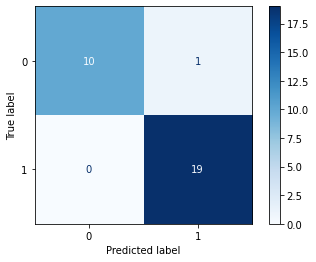

In [6]:
_ = plot_confusion_matrix(classifier, X_test, y_test, cmap='Blues')

E ao final, recebemos um resultado de 96% de acertos

In [7]:
from sklearn.metrics import accuracy_score

y_pred = classifier.predict(X_test)

accuracy_score(y_test, y_pred)

0.9666666666666667